In [1]:
from sklearn.preprocessing import StandardScaler

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from scipy.stats import ks_2samp
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
from scipy.stats import pearsonr

In [ ]:
dfpeng = sns.load_dataset("penguins")
sns.pairplot(dfpeng, hue="species")

In [2]:
data_csv = 'C:\\Users\\daant\\AMOLF\\AMFtrack\\Auto_Data.csv'
excel_address = 'C:\\Users\\daant\\Documents\\AMOLF\\ByHandSpeed\\edges\\Speeds2.xlsx'
print(data_csv)
# os.getcwd()
df1 = pd.read_csv(data_csv)
print(len(df1))
print(df1.iloc[0])

C:\Users\daant\AMOLF\AMFtrack\Auto_Data.csv
8051
Unnamed: 0.1                                                           0
Unnamed: 0                                                             0
videos_folder          /gpfs/scratch1/shared/amftrackflow/videos/Coco...
analysis_folder        /gpfs/home6/svstaalduine/Analysis/CocoTranspor...
magnification                                                       50.0
days_after_crossing                                                   11
record_time                                                     12:44:57
tot_path_drop               DATA/CocoTransport/20230818_Plate449/068/Img
folder                           CocoTransport/20230818_Plate449/068/Img
unique_id                                          20230818_Plate449_068
zpos                                                              12.204
ypos                                                             -23.233
xpos                                                             -13.037
Fi

In [3]:

# df2=df1[df1['plate_id']==df1['imaging_day']+'_Plate455']
filtered_df = df1[~df1['plate_id'].str.contains('Plate455')]
filtered_df = filtered_df[~filtered_df['plate_id'].str.contains('Plate428')]
filtered_df = filtered_df[filtered_df['magnification']==50]
filtered_df = filtered_df[filtered_df['binning']==2]
filtered_df = filtered_df[filtered_df['straight_length']>20]
filtered_df = filtered_df[filtered_df['speed_left']/filtered_df['straight_length']>-0.5]
filtered_df = filtered_df[filtered_df['speed_right']/filtered_df['straight_length']<0.5]
# filtered_df = filtered_df[filtered_df['speed_right']>1]
# filtered_df = filtered_df[filtered_df['speed_left']<-1]
    #filter speeds instead of edges based on their coverage
filtered_df.loc[(filtered_df['coverage_left']<=0.25), 'speed_left'] = np.nan
# filtered_df.loc[(filtered_df['coverage_left']<=0.25), 'flux_avg'] = np.nan
filtered_df.loc[(filtered_df['coverage_right']<=0.25), 'speed_right'] = np.nan
# filtered_df.loc[(filtered_df['coverage_right']<=0.25), 'flux_avg'] = np.nan


# df2=df2[df2['speed_left']>=-10]
# df2=df2[df2['speed_right']<=10]
print(len(filtered_df))

7628


In [4]:
dF=filtered_df[filtered_df['mode']=='F']
print(len(dF))
dF=dF[dF['fps']<=4]
print(dF['plate_id'].unique())

# print(dF.iloc[0])


dBF=filtered_df[filtered_df['mode']=='BF']
# print(len(dBF))
# dBF=dBF[dBF['fps']>=20]
print(len(dBF))


# for i in range(3):
#     rando = np.random.randint(1,len(dF))
#     print(dF['unique_id'].iloc[rando])
#     print(dF['edge_name'].iloc[rando])

2907
['20230818_Plate449' '20230806_Plate454' '20230819_Plate414'
 '20230807_Plate13' '20230904_Plate310' '20230803_Plate426'
 '20230810_Plate441' '20230815_Plate449' '20230816_Plate414'
 '20230809_Plate426' '20230731_Plate426' '20230814_Plate449'
 '20230809_Plate452' '20230903_Plate310' '20230803_Plate452'
 '20230730_Plate426' '20230812_Plate441' '20230806_Plate452'
 '20230816_Plate449' '20230807_Plate426' '20230810_Plate452'
 '20230814_Plate442' '20230901_Plate310' '20230804_Plate454'
 '20230905_Plate310' '20230811_Plate441' '20230803_Plate999'
 '20230808_Plate426' '20230906_Plate310' '20230902_Plate310'
 '20230818_Plate414' '20230817_Plate414' '20230813_Plate441'
 '20230815_Plate414' '20230813_Plate449']
4721


C:\Users\daant\anaconda3\envs\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\daant\anaconda3\envs\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\daant\anaconda3\envs\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\daant\anaconda3\envs\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

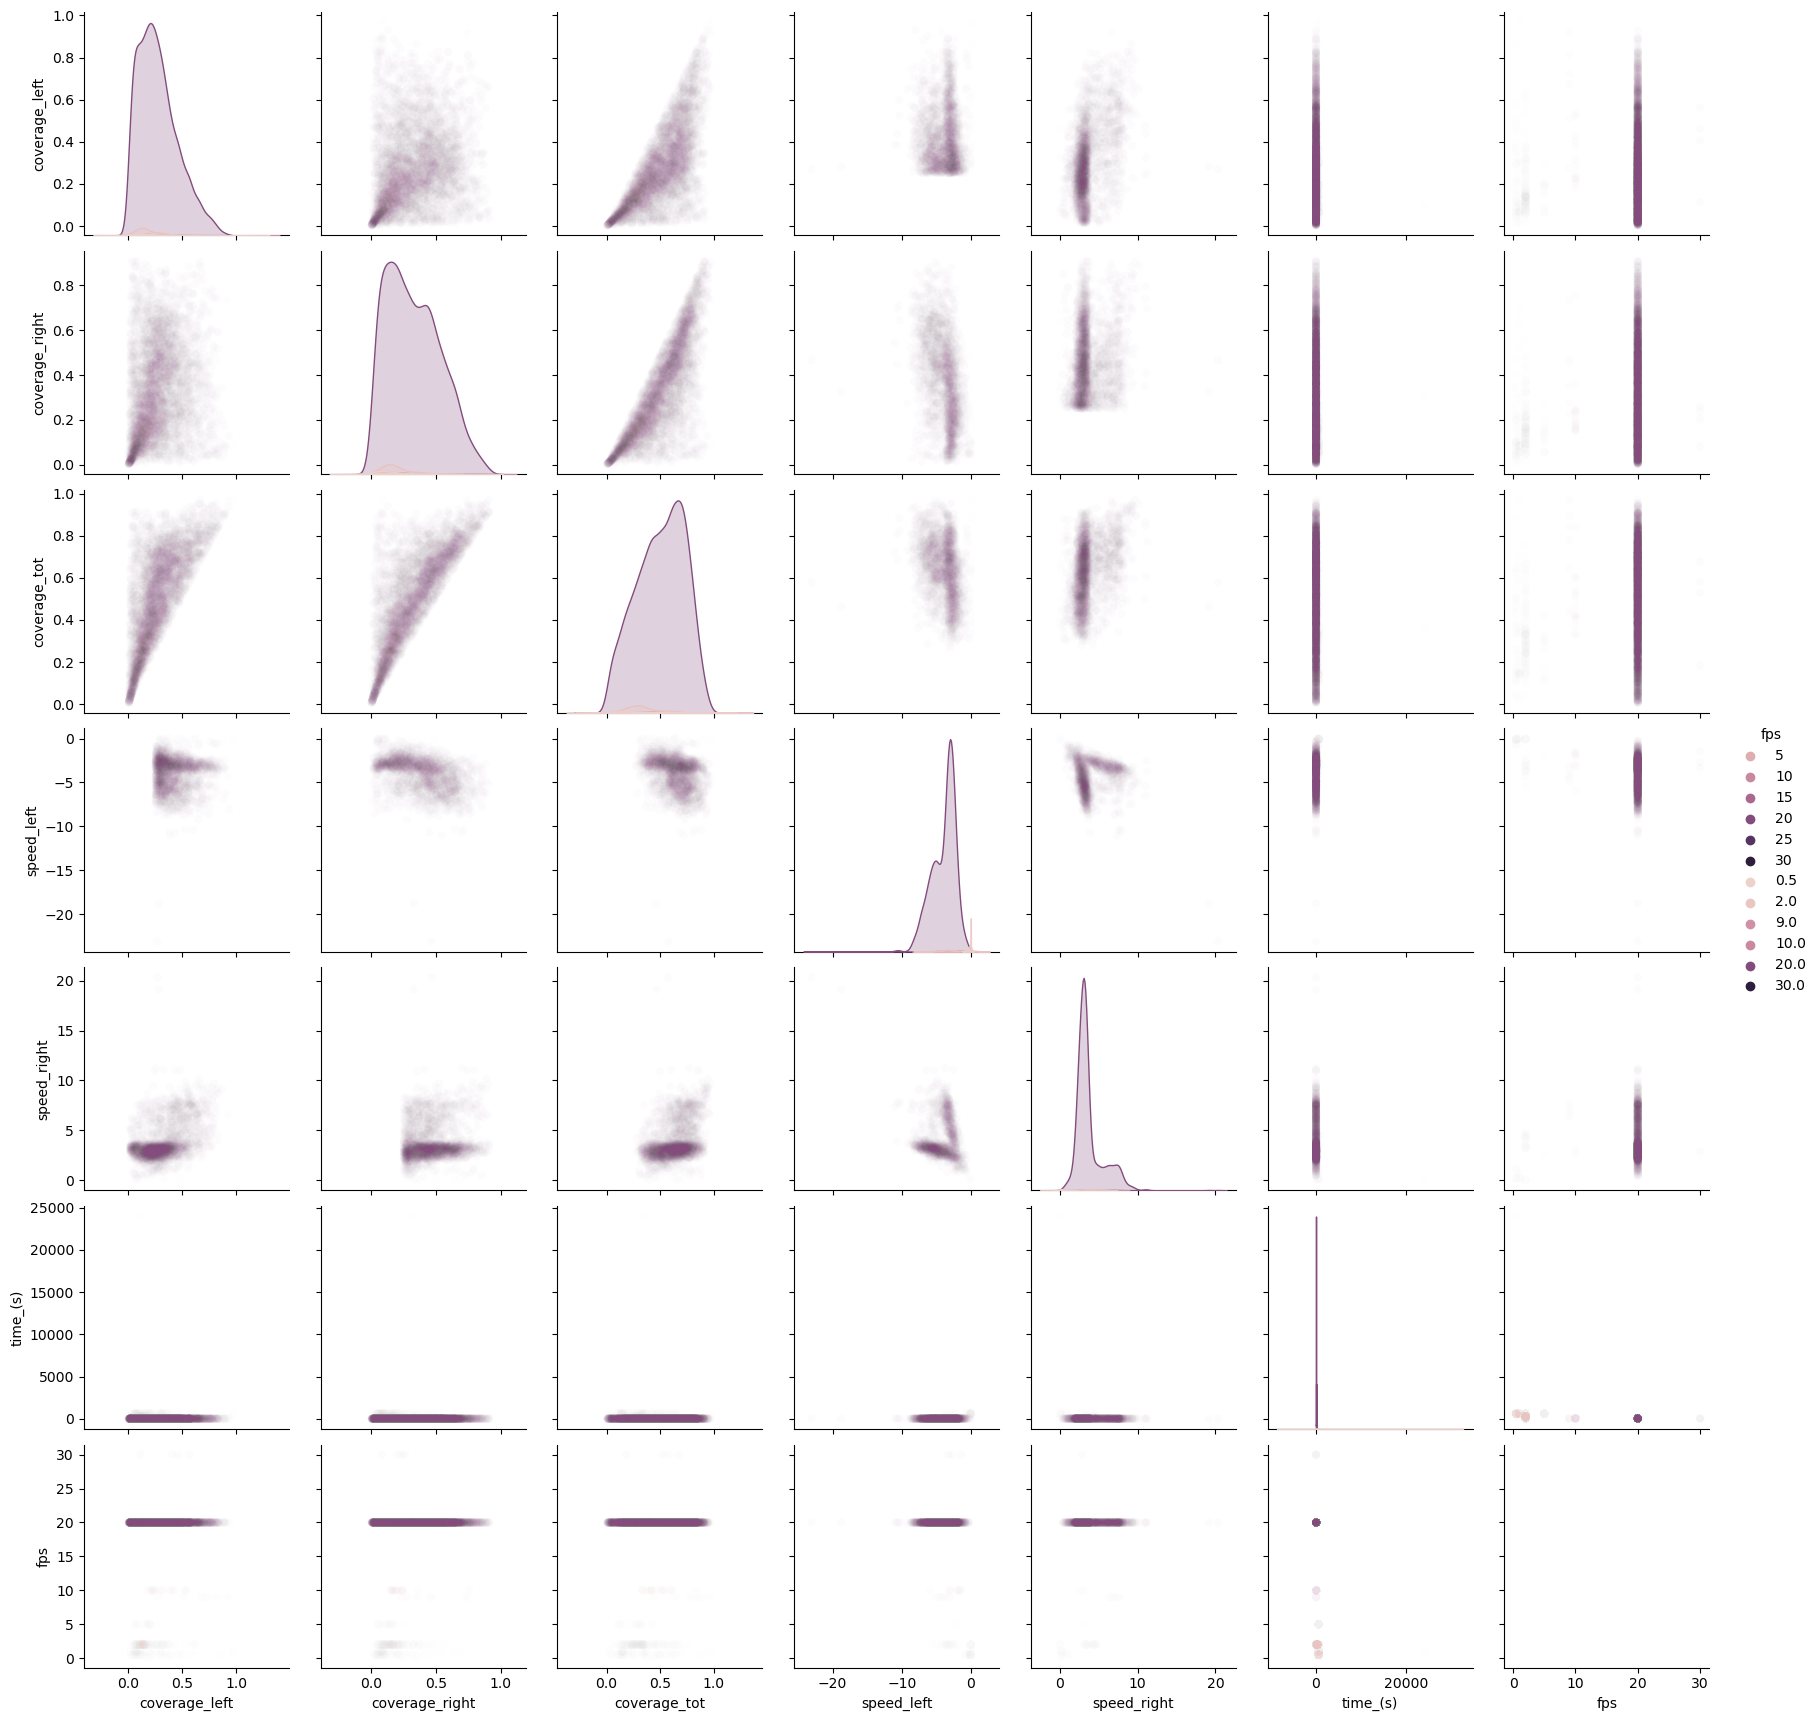

In [7]:
sns.pairplot(dBF,
             hue='fps',
             kind='scatter',
             # diag_kind='hist',
             vars=['coverage_left','coverage_right','coverage_tot','speed_left','speed_right','time_(s)','fps'],
             dropna=True,
             plot_kws={'alpha': 0.01},
            )

In [ ]:
for i in range(21):
    print('the amount of videos that have length > 100*')
    print(str(i))
    print(len(dF[dF['flux_max']>i*100]))
    # print(len(df1[df1['speed_left']<-i-5])-len(df1[df1['speed_left']<-i-6]))
    

df3=dF[dF['flux_max']>1200]
print(df3['unique_id']+df3['edge_name'])

In [5]:
byhand = pd.read_excel(excel_address)
# print(byhand)
BFhand=byhand[byhand['mode']=="BF"]
FLhand=byhand[byhand['mode']=="FL"]
print(byhand.iloc[0])


unique_id              20230730_Plate426_057
edge_name                             (5, 0)
mode                                      FL
average speed right                 2.522477
average speed left                       NaN
std_right                           0.274995
std_left                                 NaN
Name: 0, dtype: object


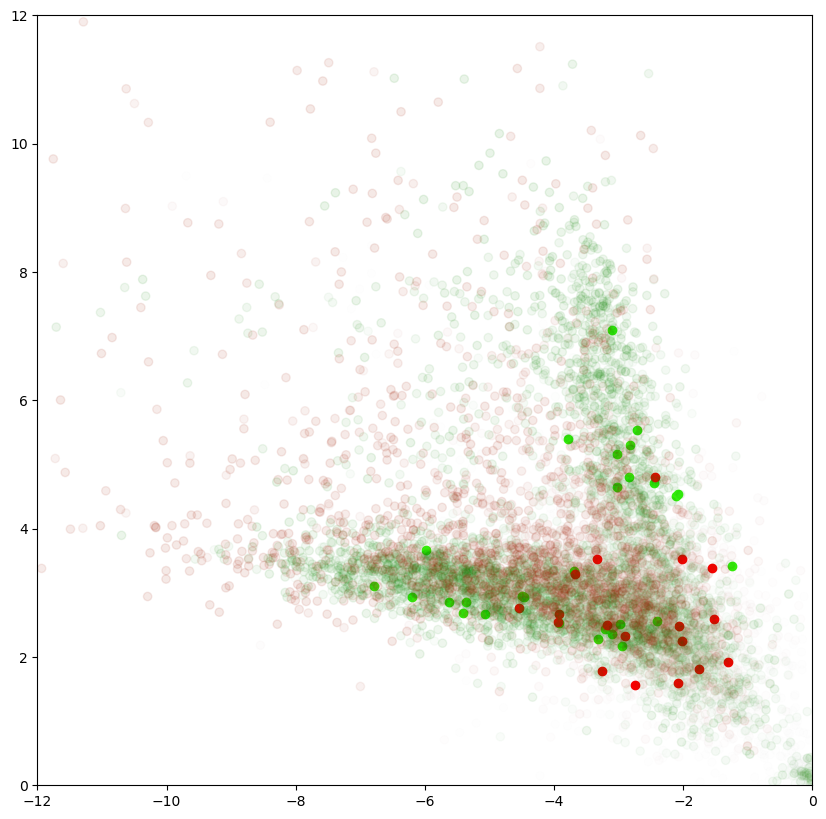

In [7]:
alpha=0.1
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.set_xlim(-12,0)
ax.set_ylim(0,12)

#due to flipping of the directions we have to multiply by -1 to compare by hand with automatic
ax.scatter(BFhand['average speed left'],BFhand['average speed right'], color='#33f10d')
ax.scatter(FLhand['average speed left'],FLhand['average speed right'], color='#f90000')
ax.scatter(dBF['speed_left'],dBF['speed_right'], alpha=alpha*dBF['coverage_tot'], color='#108604')
ax.scatter(dF['speed_left'],dF['speed_right'], alpha=alpha*dF['coverage_tot'], color='#A22107')


plt.show()

In [9]:
# del df3
df3=df1.copy()
# print(df3['date_time'].iloc[0])

In [6]:
df3 = df1[df1['plate_id'].str.contains('Plate449')]

df3['date_time']=pd.to_datetime(df3['imaging_day'].astype(str)+' '+df3['record_time'])

filtered_slowdown_df = df3.groupby(['xpos', 'ypos','edge_name', df3['date_time'].dt.hour], as_index=False).filter(lambda x: len(x) == 3 and x['mode'].iloc[2] == 'BF')

first = filtered_slowdown_df.groupby(['xpos', 'ypos','edge_name', df3['date_time'].dt.hour], as_index=False).apply(lambda x: x.sort_values(by='video_int').head(1)).reset_index(drop=True)
second = filtered_slowdown_df.groupby(['xpos', 'ypos','edge_name', df3['date_time'].dt.hour], as_index=False).apply(lambda x: x.sort_values(by='video_int').head(2).tail(1)).reset_index(drop=True)
third = filtered_slowdown_df.groupby(['xpos', 'ypos','edge_name', df3['date_time'].dt.hour], as_index=False).apply(lambda x: x.sort_values(by='video_int').tail(1)).reset_index(drop=True)


# first = filtered_slowdown_df.groupby(['xpos', 'ypos','edge_name', df3['date_time'].dt.hour], as_index=False).apply(lambda x: x.sort_values(by='video_int')).reset_index(drop=True)#.first()
# second = filtered_slowdown_df.groupby(['xpos', 'ypos','edge_name', df3['date_time'].dt.hour], as_index=False).apply(lambda x: x.sort_values(by='video_int')).reset_index(drop=True)#.nth(1)
# third = filtered_slowdown_df.groupby(['xpos', 'ypos','edge_name', df3['date_time'].dt.hour], as_index=False).apply(lambda x: x.sort_values(by='video_int')).reset_index(drop=True)#.last()

# third = third[third['mode']=='BF']

# first = filtered_slowdown_df.sort_values('video_int').iloc[0].reset_index(drop=True)
# second = filtered_slowdown_df.sort_values('video_int').groupby(['xpos', 'ypos','edge_name', filtered_slowdown_df['date_time'].dt.hour], as_index=False).iloc[1].reset_index(drop=True)
# third = filtered_slowdown_df.sort_values('video_int').groupby(['xpos', 'ypos','edge_name', filtered_slowdown_df['date_time'].dt.hour], as_index=False).iloc[-1].reset_index(drop=True)

# Define a function to select the videos based on the specified conditions
# def select_videos(group):
    
#     return group.iloc[[0, 1, 2]]

# Apply the function to each group and concatenate the results
# result_df = grouped.apply(select_videos).reset_index(drop=True)
# print(third.sort_values('video_int'))
print(len(first))
# print(first['video_int'].iloc[:12])
# print(first['edge_name'].iloc[:12])
print(first['record_time'].iloc[0])
print(second['record_time'].iloc[0])
print(third['record_time'].iloc[0])
print(first['fps'].iloc[:12])
print(second['fps'].iloc[:12])
print(third['fps'].iloc[:12])




32
 12:27:05
 12:27:20
 12:28:13
0     20.0
1     20.0
2     20.0
3     20.0
4     20.0
5     20.0
6     20.0
7     20.0
8     20.0
9     20.0
10    20.0
11    20.0
Name: fps, dtype: float64
0     2.0
1     2.0
2     2.0
3     1.0
4     1.0
5     1.0
6     2.0
7     2.0
8     2.0
9     2.0
10    2.0
11    2.0
Name: fps, dtype: float64
0      2.0
1      2.0
2      2.0
3     20.0
4     20.0
5     20.0
6     20.0
7     20.0
8     20.0
9      2.0
10    20.0
11    20.0
Name: fps, dtype: float64


C:\Users\daant\AppData\Local\Temp\ipykernel_4400\1723625811.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['date_time']=pd.to_datetime(df3['imaging_day'].astype(str)+' '+df3['record_time'])


In [98]:
data = {'x': [2, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3],
        'y': [5, 6, 7, 8, 5, 6, 7, 8, 5, 6, 7],
        'value': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]}

df = pd.DataFrame(data)

# Group by 'x' and 'y' and filter based on occurrence count
filtered_df = df.groupby(['x', 'y']).filter(lambda group: len(group) == 3)

# Display the filtered DataFrame
print(filtered_df)

    x  y  value
1   2  6     20
2   3  7     30
5   2  6     60
6   3  7     70
9   2  6    100
10  3  7    110


KS Statistic: 0.078125
P-value: 0.9907746509475145


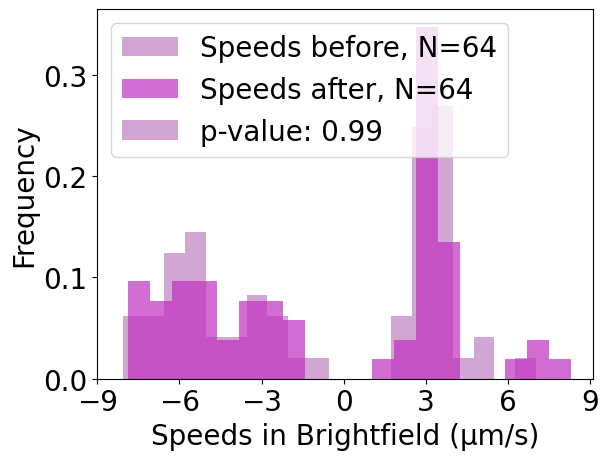

In [7]:
plt.close('all')

# filtered_slowdown_dF = filtered_slowdown_df[filtered_slowdown_df['mode']=='F']
# print(len(filtered_slowdown_dF))
# filtered_slowdown_dBF = filtered_slowdown_df[filtered_slowdown_df['mode']=='BF']
# print(len(filtered_slowdown_dBF))
plt.rcParams.update({'font.size': 20})

first_combined = np.concatenate([first['speed_left'], first['speed_right']])
second_combined = np.concatenate([second['speed_left'], second['speed_right']])
third_combined = np.concatenate([third['speed_left'], third['speed_right']])



plt.hist(first_combined, bins=20, color='#C080C0', label=f'Speeds before, N={len(first_combined)}', alpha=0.7, density=True)
# plt.hist(second_combined, bins=20, color='#C06C60', label='Speeds in fluorescence', alpha=0.7)
plt.hist(third_combined, bins=20, color='#C030C0', label=f'Speeds after, N={len(third_combined)}', alpha=0.7, density=True)


plt.xticks(np.arange(-9, 10, 3))

# Perform KS test
ks_statistic, p_value = ks_2samp(first_combined, third_combined)

# Display the results
print("KS Statistic:", ks_statistic)
print("P-value:", p_value)

# legend_pvalue = plt.legend([f'p-value: {p_value:.2f}'], loc='center left')

# plt.gca().add_artist(legend_pvalue)

plt.xlabel('Speeds in Brightfield (µm/s)')
plt.ylabel('Frequency')
plt.legend(
    [f'Speeds before, N={len(first_combined)}', f'Speeds after, N={len(third_combined)}', f'p-value: {p_value:.2f}'],
           fontsize='20', 
    loc='upper left',
    )

# plt.xlim(-30, 30)

# plt.savefig("histogram_FL_Speeds.svg")
plt.show()

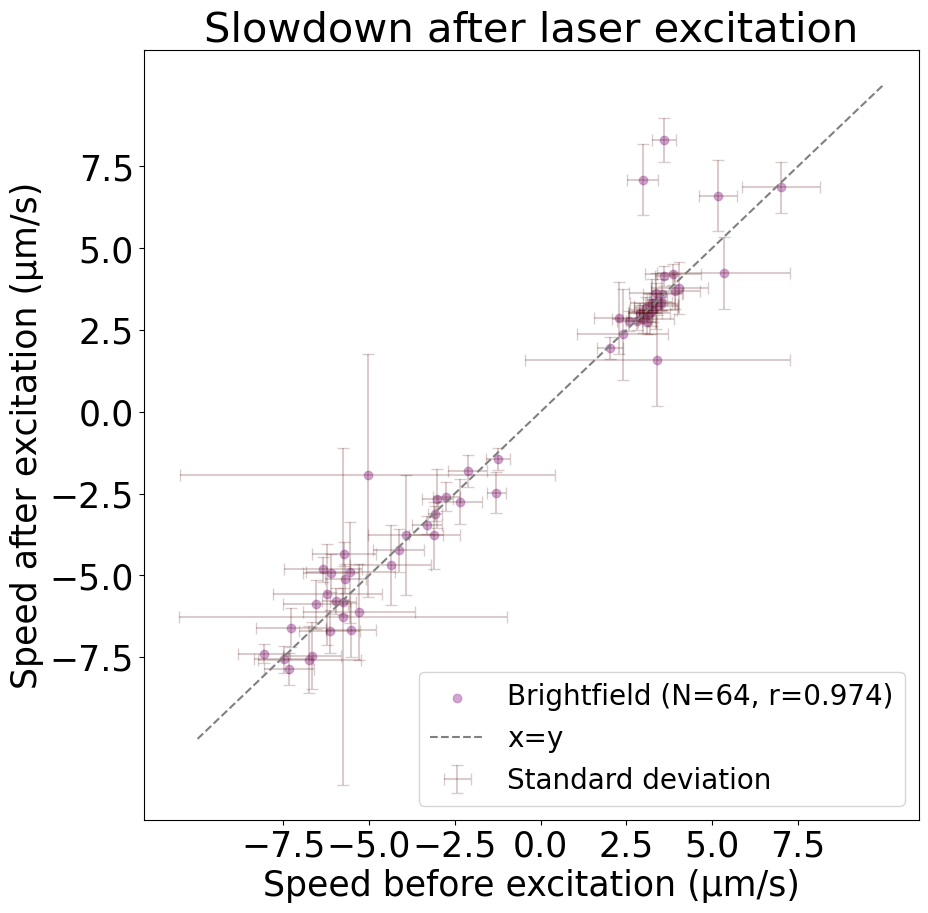

In [22]:
plt.close('all')
fig, ax = plt.subplots(1, figsize=(10, 10))

plt.rcParams.update({'font.size': 25})

ax.errorbar(
    first['speed_left'],
    third['speed_left'],
    xerr=first['speed_left_std'],
    yerr=third['speed_left_std'],
    alpha=0.2,
    fmt='none',
    ecolor='#490400',
    capsize=4,
    label='Standard deviation',
    )

ax.errorbar(
    first['speed_right'],
    third['speed_right'],
    xerr=first['speed_right_std'],
    yerr=third['speed_right_std'],
    alpha=0.2,
    fmt='none',
    ecolor='#490400',
    capsize=4,
    )
correlation_coefficient, p_value = pearsonr(first_combined, third_combined)

ax.scatter(first_combined, third_combined, alpha=0.7, color='#C080C0', label = f'Brightfield (N={len(third_combined)}, r={correlation_coefficient:.3f})')
plt.xticks(np.arange(-7.5, 10, 2.5))
plt.yticks(np.arange(-7.5, 10, 2.5))

plt.plot([-10, 10], [-10, 10], linestyle='--', color='gray', label='x=y')

plt.legend(fontsize='20', loc='lower right')
plt.title('Slowdown after laser excitation')
plt.xlabel('Speed before excitation (µm/s)')
plt.ylabel('Speed after excitation (µm/s)')
plt.show()

32.89700310024113


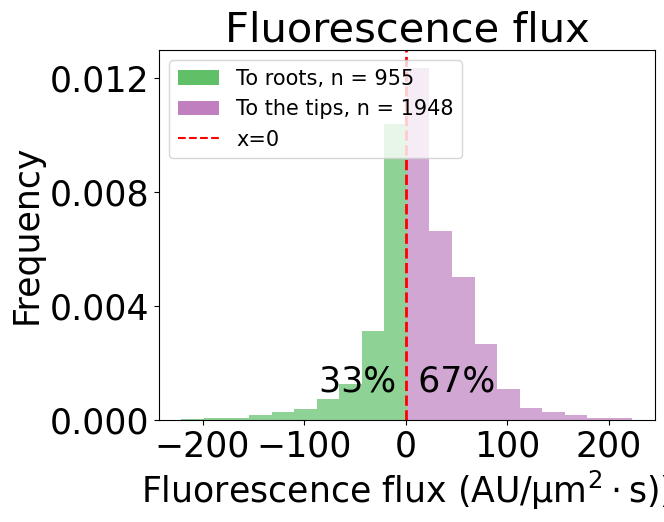

In [10]:
plt.close('all')

plt.rcParams.update({'font.size': 25})


# Create a histogram
n, bins, patches = plt.hist(dF['flux_avg'], bins=20, color='#C080C0', label='Lipid flux direction', alpha=0.7, density=True)



# Split the bins and color them differently
x_split = 0
for patch, bin_value in zip(patches, bins):
    if bin_value < x_split:
        patch.set_facecolor('#5FC068')
    else:
        patch.set_facecolor('#C080C0')

total_values = len(dF)
left_percentage = len(dF[dF['flux_avg'] < x_split]) / total_values * 100
print(left_percentage)
right_percentage = len(dF[dF['flux_avg'] >= x_split]) / total_values * 100

left_label = f'To roots, n = {total_values*left_percentage/100:.0f}'
right_label = f'To the tips, n = {total_values*right_percentage/100:.0f}'

# Add a vertical red line at x=0
plt.axvline(x=x_split, color='red', linestyle='--', linewidth=2, label=f'x=0 ({left_percentage:.2f}% / {right_percentage:.2f}%)')
plt.text(-85,0.0010,f'{left_percentage:.0f}%  {right_percentage:.0f}%')
legend_labels = [left_label, right_label, 'x=0']
legend_handles = [
    Patch(facecolor='#5FC068', edgecolor='None', label=left_label),
    Patch(facecolor='#C080C0', edgecolor='None', label=right_label),
    Line2D([0], [0], marker='', linestyle='--', color='red', label='x=0')
]
plt.legend(handles=legend_handles, labels=legend_labels, fontsize='15', loc='upper left')
plt.title('Fluorescence flux')
plt.xlabel('Fluorescence flux (AU/µm$^2 \cdot$s))')
plt.ylabel('Frequency')
# plt.legend()
plt.xticks(np.arange(-200, 210, 100))
plt.yticks(np.arange(0, 0.015, 0.004))

# plt.xlim(-30, 30)

# plt.savefig("histogram_FL_Speeds.svg")
plt.show()

In [24]:
df1['mode'] = df1['mode'].replace('F','FL')

combined_df = pd.merge(df1, byhand, on=['unique_id','edge_name','mode'], how='inner')
# print(combined_df.iloc[1])
FL_comb = combined_df[combined_df['mode']=='FL']
BF_comb = combined_df[combined_df['mode']=='BF']
print(len(FL_comb))
print(len(BF_comb))


30
30


[-3.94494526 -4.53976563 -3.25367191 -2.43668337 -1.30903498 -2.7501841
 -3.66983955 -2.02261838 -3.34349172 -3.93120754 -2.01396565 -1.56160783
 -1.75313981 -2.50522232 -1.52100894 -2.08732232 -2.06933664 -2.90749821
 -3.18335958  2.53834087  2.75876604  1.78199796  4.79936984  1.9232944
  1.55748011  3.29949671  3.49812806  2.5224767   3.52701891  3.52347001
  5.37013654  2.67282478  2.97055192  2.25209974  3.38821187  1.80823954
  2.5845326   5.49362745  2.9995862   1.59651137  2.1271053   2.47691078
  0.35293207  2.32864069  2.50440568]
[-4.566812  -6.7321653 -3.5516517 -3.987344  -3.3944433 -2.7682323
 -6.421217  -2.5019772 -3.9018006 -2.6193752 -3.096672  -5.183651
 -1.8966596 -2.5745106 -3.383861  -2.696477  -3.7655525 -2.0270457
 -3.7504604  3.0389981  3.0989077  3.1551833  5.447854   2.2984226
  2.522173   6.7646117  5.6670747  2.9130936  4.0336637  4.4001265
  8.576868   4.757184   3.5810604  3.04344    4.4033914  1.838384
  4.2814217  5.329517   3.583205   2.3370297  2.50996

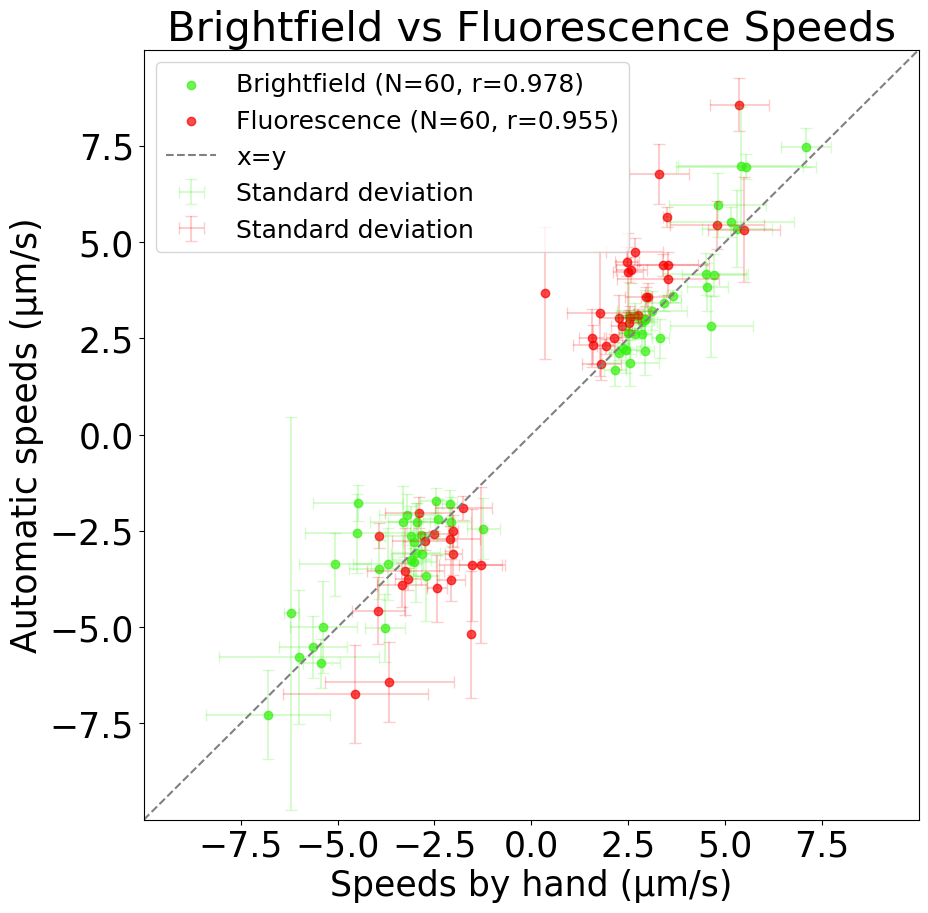

In [36]:
plt.close('all')

fig, ax = plt.subplots(1, figsize=(10, 10))
# ax.set_xlim(-12,0)
# ax.set_ylim(0,12)

plt.rcParams.update({'font.size': 25})

# ax.scatter(dBF['speed_left'],dBF['speed_right'], alpha=alpha*dBF['coverage_tot'], color='#108604')
# ax.scatter(dF['speed_left'],dF['speed_right'], alpha=alpha*dF['coverage_tot'], color='#A22107')
ax.errorbar(
    BF_comb['average speed right'],
    BF_comb['speed_right'],
    xerr=BF_comb['std_right'],
    yerr=BF_comb['speed_right_std'],
    alpha=0.2,
    fmt='none',
    ecolor='#33f10d',
    capsize=4,
    label='Standard deviation',
)
ax.errorbar(
    BF_comb['average speed left'],
    BF_comb['speed_left'],
    xerr=BF_comb['std_left'],
    yerr=BF_comb['speed_left_std'],
    alpha=0.2,
    fmt='none',
    ecolor='#33f10d',
    capsize=4,
    )

ax.errorbar(
    FL_comb['average speed right'],
    FL_comb['speed_right'],
    xerr=FL_comb['std_right'],
    yerr=FL_comb['speed_right_std'],
    alpha=0.2,
    fmt='none',
    ecolor='#f90000',
    capsize=4,
    label='Standard deviation',
)
ax.errorbar(
    FL_comb['average speed left'],
    FL_comb['speed_left'],
    xerr=FL_comb['std_left'],
    yerr=FL_comb['speed_left_std'],
    alpha=0.2,
    fmt='none',
    ecolor='#f90000',
    capsize=4,
    )

# ax.errorbar(
#     BF_comb['average speed left'],
#     FL_comb['average speed left'],
#     xerr=BF_comb['std_left'],
#     yerr=FL_comb['std_left'],
#     alpha=0.2,
#     fmt='none',
#     ecolor='#490400',
#     capsize=4,
#     label='Standard deviation',
#     )
# ax.errorbar(
#     BF_comb['speed_left'],
#     FL_comb['speed_left'],
#     xerr=BF_comb['speed_left_std'],
#     yerr=FL_comb['speed_left_std'],
#     alpha=0.2,
#     fmt='none',
#     ecolor='#ffd700',
#     capsize=4,
#     )
# ax.errorbar(
#     BF_comb['average speed right'],
#     FL_comb['average speed right'],
#     xerr=BF_comb['std_right'],
#     yerr=FL_comb['std_right'],
#     alpha=0.2,
#     fmt='none',
#     ecolor='#490400',
#     capsize=4,
#     )
# ax.errorbar(
#     BF_comb['speed_right'],
#     FL_comb['speed_right'],
#     xerr=BF_comb['speed_right_std'],
#     yerr=FL_comb['speed_right_std'],
#     alpha=0.2,
#     fmt='none',
#     ecolor='#ffd700',
#     capsize=4,
#     label='Standard deviation',
#     )
# BF_comb['std_left'].fillna(3, inplace=True)
# BF_comb['std_right'].fillna(3, inplace=True)
# FL_comb['std_left'].fillna(3, inplace=True)
# FL_comb['std_right'].fillna(3, inplace=True)

BF_comb_hand = np.concatenate([BF_comb['average speed left'], BF_comb['average speed right']])
FL_comb_hand = np.concatenate([FL_comb['average speed left'], FL_comb['average speed right']])
BF_comb_auto = np.concatenate([BF_comb['speed_left'], BF_comb['speed_right']])
FL_comb_auto = np.concatenate([FL_comb['speed_left'], FL_comb['speed_right']])

# Create a boolean mask to identify NaN or Inf values in either x or y
mask = ~np.logical_or(np.isnan(BF_comb_hand) | np.isinf(BF_comb_hand), np.isnan(BF_comb_auto) | np.isinf(BF_comb_auto))
maskf = ~np.logical_or(np.isnan(FL_comb_hand) | np.isinf(FL_comb_hand), np.isnan(FL_comb_auto) | np.isinf(FL_comb_auto))

# mask = ~np.logical_or(np.isnan(BF_comb_hand) | np.isinf(BF_comb_hand), np.isnan(FL_comb_hand) | np.isinf(FL_comb_hand))
# maska = ~np.logical_or(np.isnan(BF_comb_auto) | np.isinf(BF_comb_auto), np.isnan(FL_comb_auto) | np.isinf(FL_comb_auto))


# Apply the mask to both x and y
x_cleaned = BF_comb_hand[mask]
y_cleaned = BF_comb_auto[mask]
x_cleanedf = FL_comb_hand[maskf]
y_cleanedf = FL_comb_auto[maskf]

print(x_cleanedf)
print(y_cleanedf)

correlation_coefficient, p_value = pearsonr(x_cleaned, y_cleaned)
correlation_coefficientf, p_valuef = pearsonr(x_cleanedf, y_cleanedf)

print("Pearson correlation coefficient (r):", correlation_coefficient)
print("P-value:", p_value)


ax.scatter(BF_comb_hand,BF_comb_auto, alpha=0.7, color='#33f10d', label = f'Brightfield (N={len(BF_comb_hand)}, r={correlation_coefficient:.3f})')
ax.scatter(FL_comb_hand,FL_comb_auto, alpha=0.7, color='#f90000', label = f'Fluorescence (N={len(BF_comb_auto)}, r={correlation_coefficientf:.3f})')
# ax.scatter(BF_comb_hand, FL_comb_hand, alpha=0.7, color='#490400', label = f'By hand (N={len(BF_comb_hand)}, r={correlation_coefficient:.3f})')
# ax.scatter(BF_comb_auto, FL_comb_auto, alpha=0.7, color='#ffd700', label = f'Auto (N={len(BF_comb_auto)}, r={correlation_coefficientf:.3f})')


plt.plot([-10, 10], [-10, 10], linestyle='--', color='gray', label='x=y')

legend_artist = Line2D(
    [0, 1], [0, 0],
    color='red',
    marker='',
    linestyle='-',
    linewidth=2,
    markersize=8,
    markerfacecolor='green',
    label='Standard Deviation'
)

plt.xticks(np.arange(-7.5, 10, 2.5))
plt.yticks(np.arange(-7.5, 10, 2.5))
plt.title('Brightfield vs Fluorescence Speeds')
plt.xlabel('Speeds by hand (µm/s)')
plt.ylabel('Automatic speeds (µm/s)')
handles, labels = plt.gca().get_legend_handles_labels()

# # Add the custom entry to the list
# handles.append(legend_artist)
# labels.append('Standard Deviation')

# Add the legend with all entries
plt.legend(handles=handles, labels=labels, fontsize='18', loc='upper left')

plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.show()

KS Statistic: 0.09348171721730292
P-value: 5.329904884570451e-15


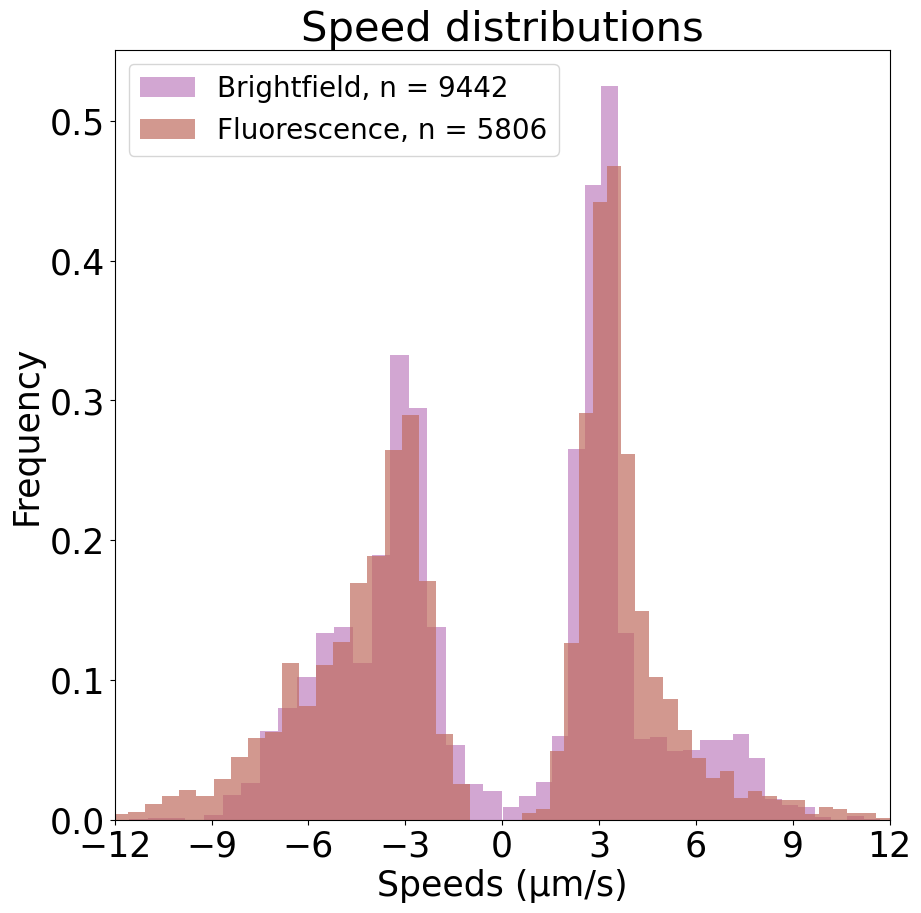

In [12]:
plt.close('all')

fig, ax = plt.subplots(1, figsize=(10, 10))

# combined_for_histBF = dBF['speed_left'].append(dBF['speed_right'], ignore_index=True)
combined_for_histBF = np.concatenate([dBF['speed_left'], dBF['speed_right']])
combined_for_histFL = np.concatenate([dF['speed_left'], dF['speed_right']])
arr_cleaned = combined_for_histBF[~np.logical_or(np.isnan(combined_for_histBF), np.isinf(combined_for_histBF))]
arr_cleanedf = combined_for_histFL[~np.logical_or(np.isnan(combined_for_histFL), np.isinf(combined_for_histFL))]


plt.hist(dBF['speed_left'], bins=40, color='#C080C0', label='Brightfield', alpha=0.7, density=True)
plt.hist(dBF['speed_right'], bins=40, color='#C080C0', alpha=0.7, density=True)
# plt.hist(dBF['speed_right'], bins=10, color='#C080C0', alpha=0.7)
plt.hist(dF['speed_left'], bins=40, color='#C06C60', label='Fluorescence', alpha=0.7, density=True)
plt.hist(dF['speed_right'], bins=40, color='#C06C60', alpha=0.7, density=True)

# plt.hist(dF['speed_right'], bins=10, color='#C06C60', alpha=0.7)

# mu, std = 0, 3.8  # You can adjust mean (mu) and standard deviation (std) as needed
# x = np.linspace(-30, 30, 1000)
# p = norm.pdf(x, mu, std)

# # Scale the Gaussian distribution to match the histogram height
# hist, bin_edges = np.histogram(arr_cleaned, bins=10, density=True)
# scaling_factor = 12600
# p *= scaling_factor

mu, std = norm.fit(arr_cleanedf.flatten())

# Plot the Gaussian distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

scaling_factor = 1200 / max(p)
p *= scaling_factor

# Plot the Gaussian distribution
# plt.plot(x, p, 'k', linewidth=2, alpha=0.7, label='Gaussian fit')

# mean1, std1 = np.mean(arr_cleaned), np.std(arr_cleaned)
# mean2, std2 = np.mean(arr_cleanedf), np.std(arr_cleanedf)
# n1, n2 = len(arr_cleaned), len(arr_cleanedf)

# # Calculate Z-score
# z_score = (mean1 - mean2) / np.sqrt((std1**2 / n1) + (std2**2 / n2))

# # Calculate p-value
# p_value = 2 * (1 - norm.cdf(np.abs(z_score)))

# # Display results
# print("Z-score:", z_score)
# print("P-value:", p_value)

# Perform KS test
statistic, p_value = ks_2samp(arr_cleanedf, arr_cleaned, method='asymp')

#ks_2samp
#mannwhitneyu

# Display the results
print("KS Statistic:", statistic)
print("P-value:", p_value)

plt.xticks(np.arange(-12, 15, 3))
plt.title('Speed distributions')
plt.xlabel('Speeds (µm/s)')
plt.ylabel('Frequency')
plt.legend([f'Brightfield, n = {len(combined_for_histBF)}',f'Fluorescence, n = {len(combined_for_histFL)}'],fontsize='20', loc='upper left')

plt.xlim(-12, 12)

plt.savefig("histogram_FL_Speeds.svg")
plt.show()

C:\Users\daant\anaconda3\envs\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\daant\anaconda3\envs\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\daant\anaconda3\envs\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\daant\anaconda3\envs\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

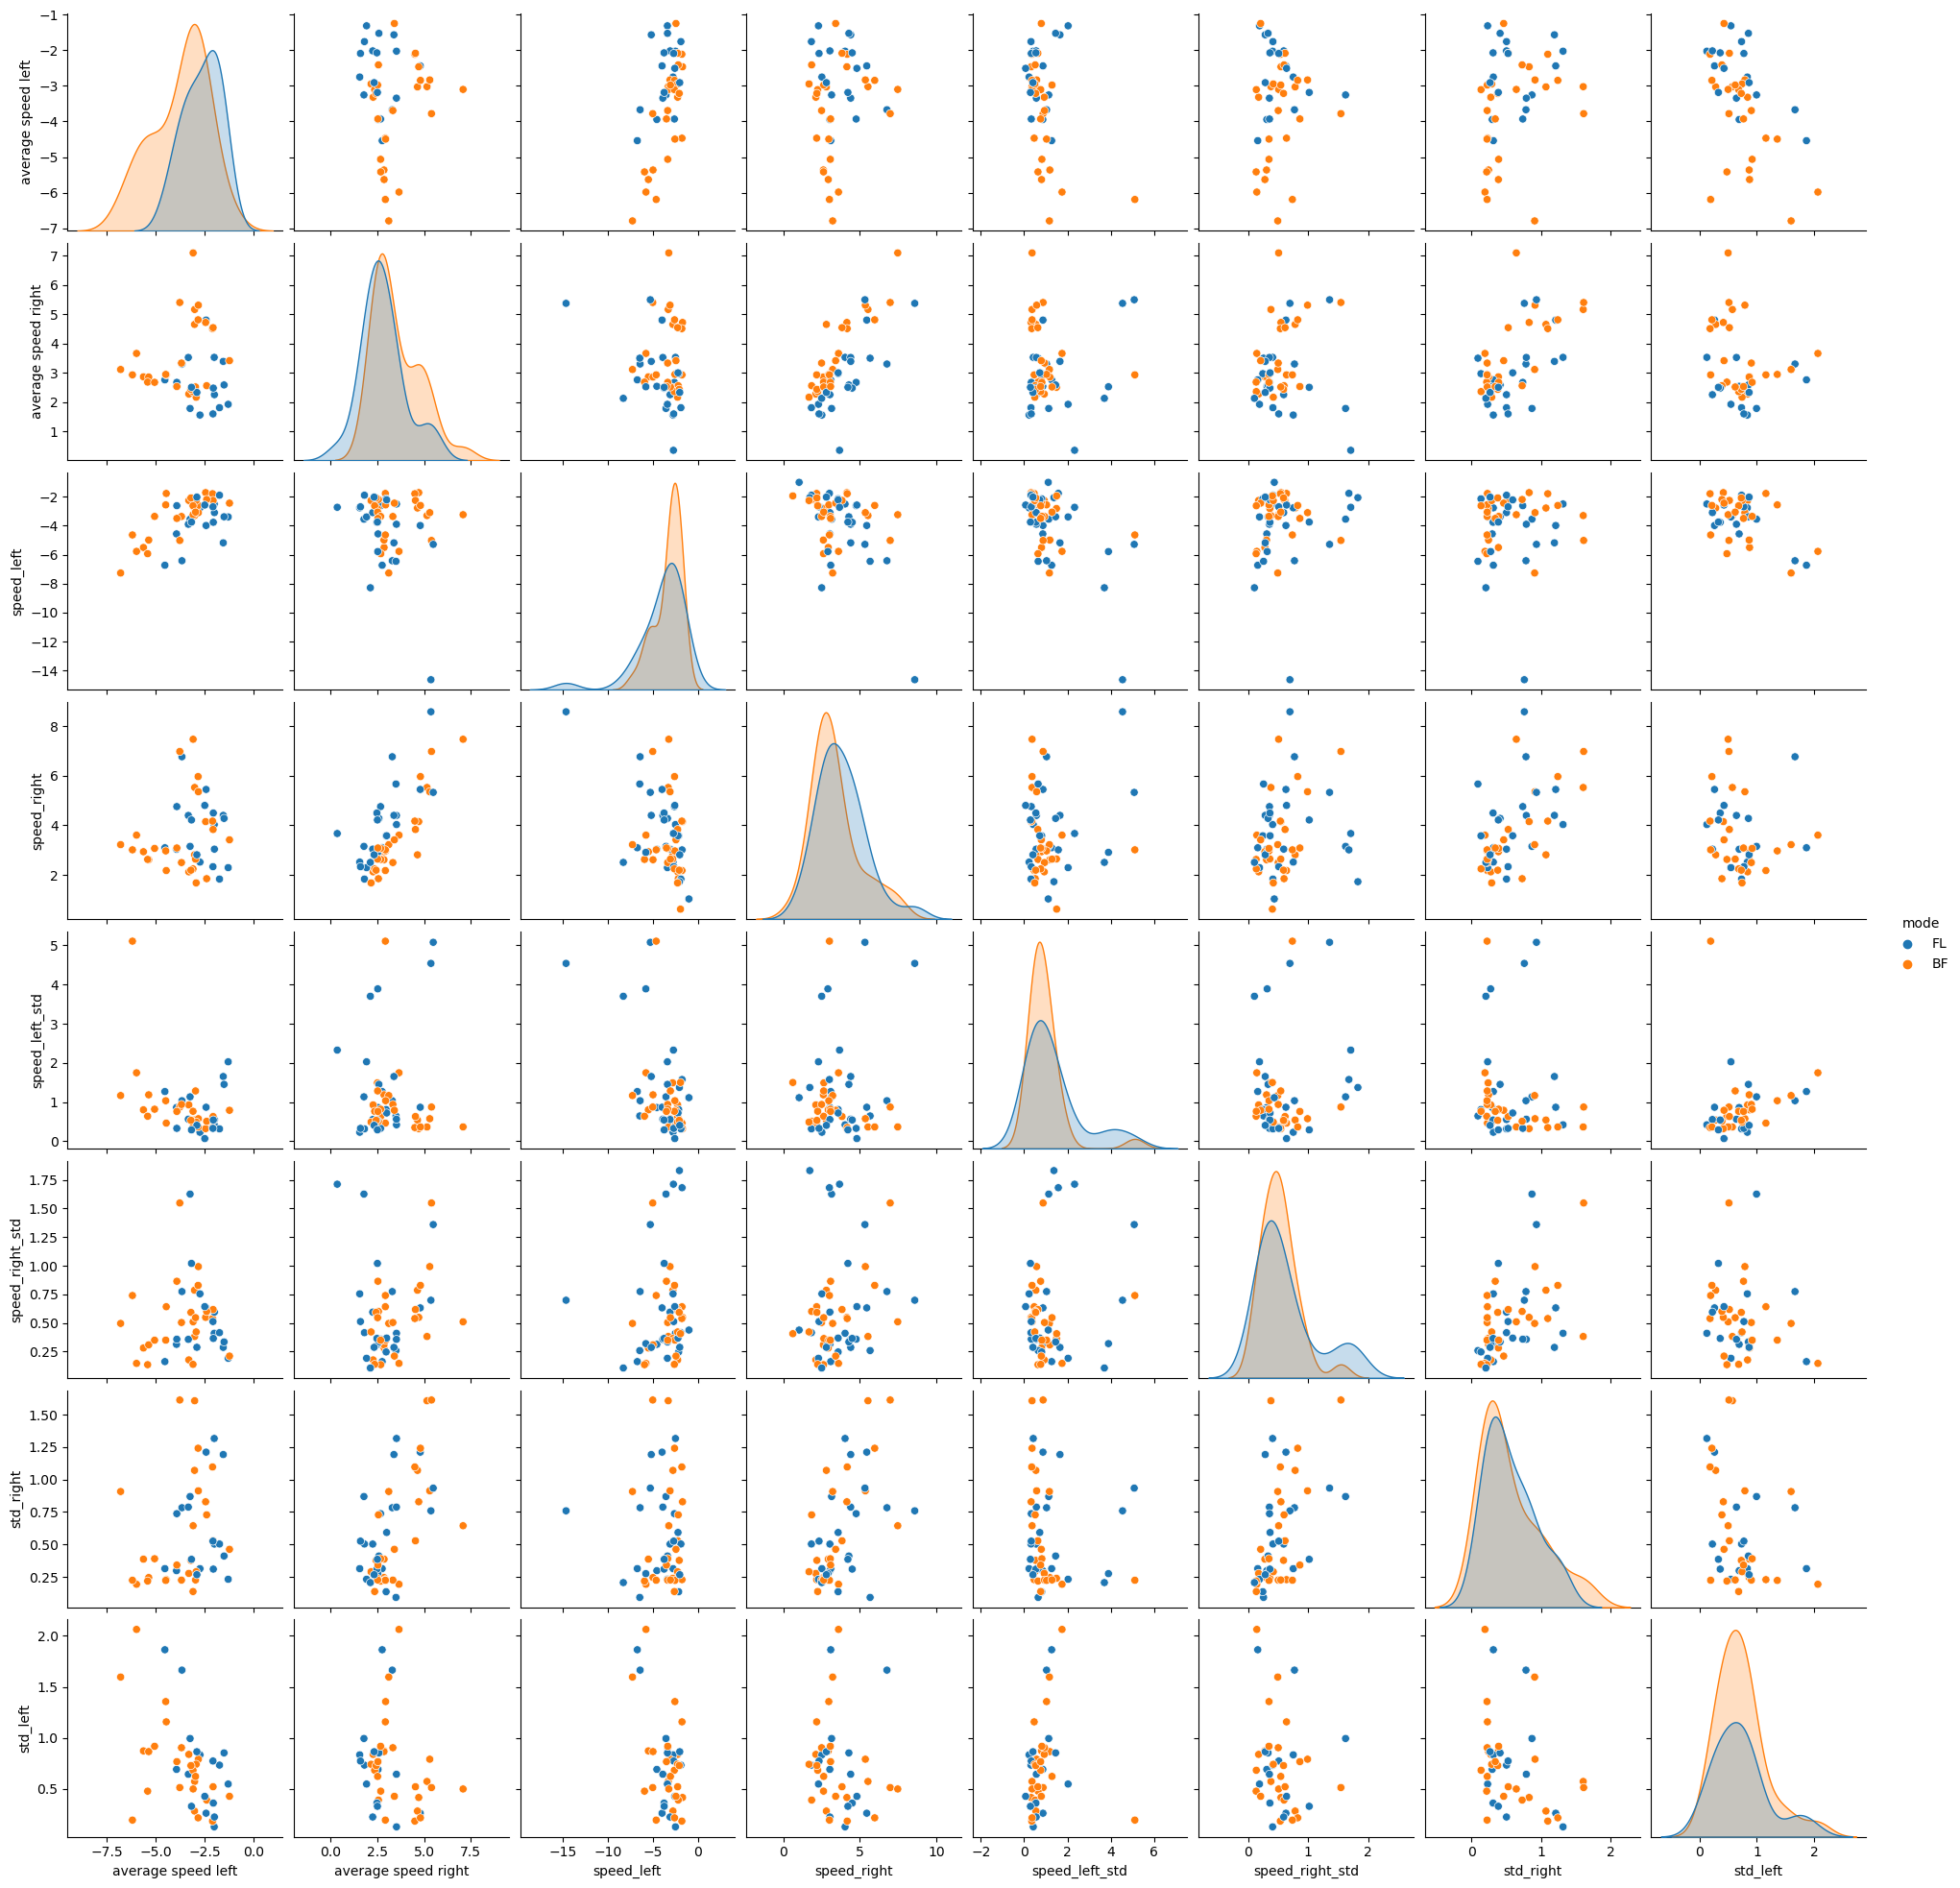

In [72]:
sns.pairplot(combined_df,
             hue='mode',
             kind='scatter',
             # diag_kind='hist',
             vars=['average speed left','average speed right','speed_left','speed_right','speed_left_std','speed_right_std','std_right', 'std_left'],
             dropna=True,
             # plot_kws={'alpha': 0.01},
            )

C:\Users\daant\anaconda3\envs\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\daant\anaconda3\envs\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\daant\anaconda3\envs\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\daant\anaconda3\envs\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

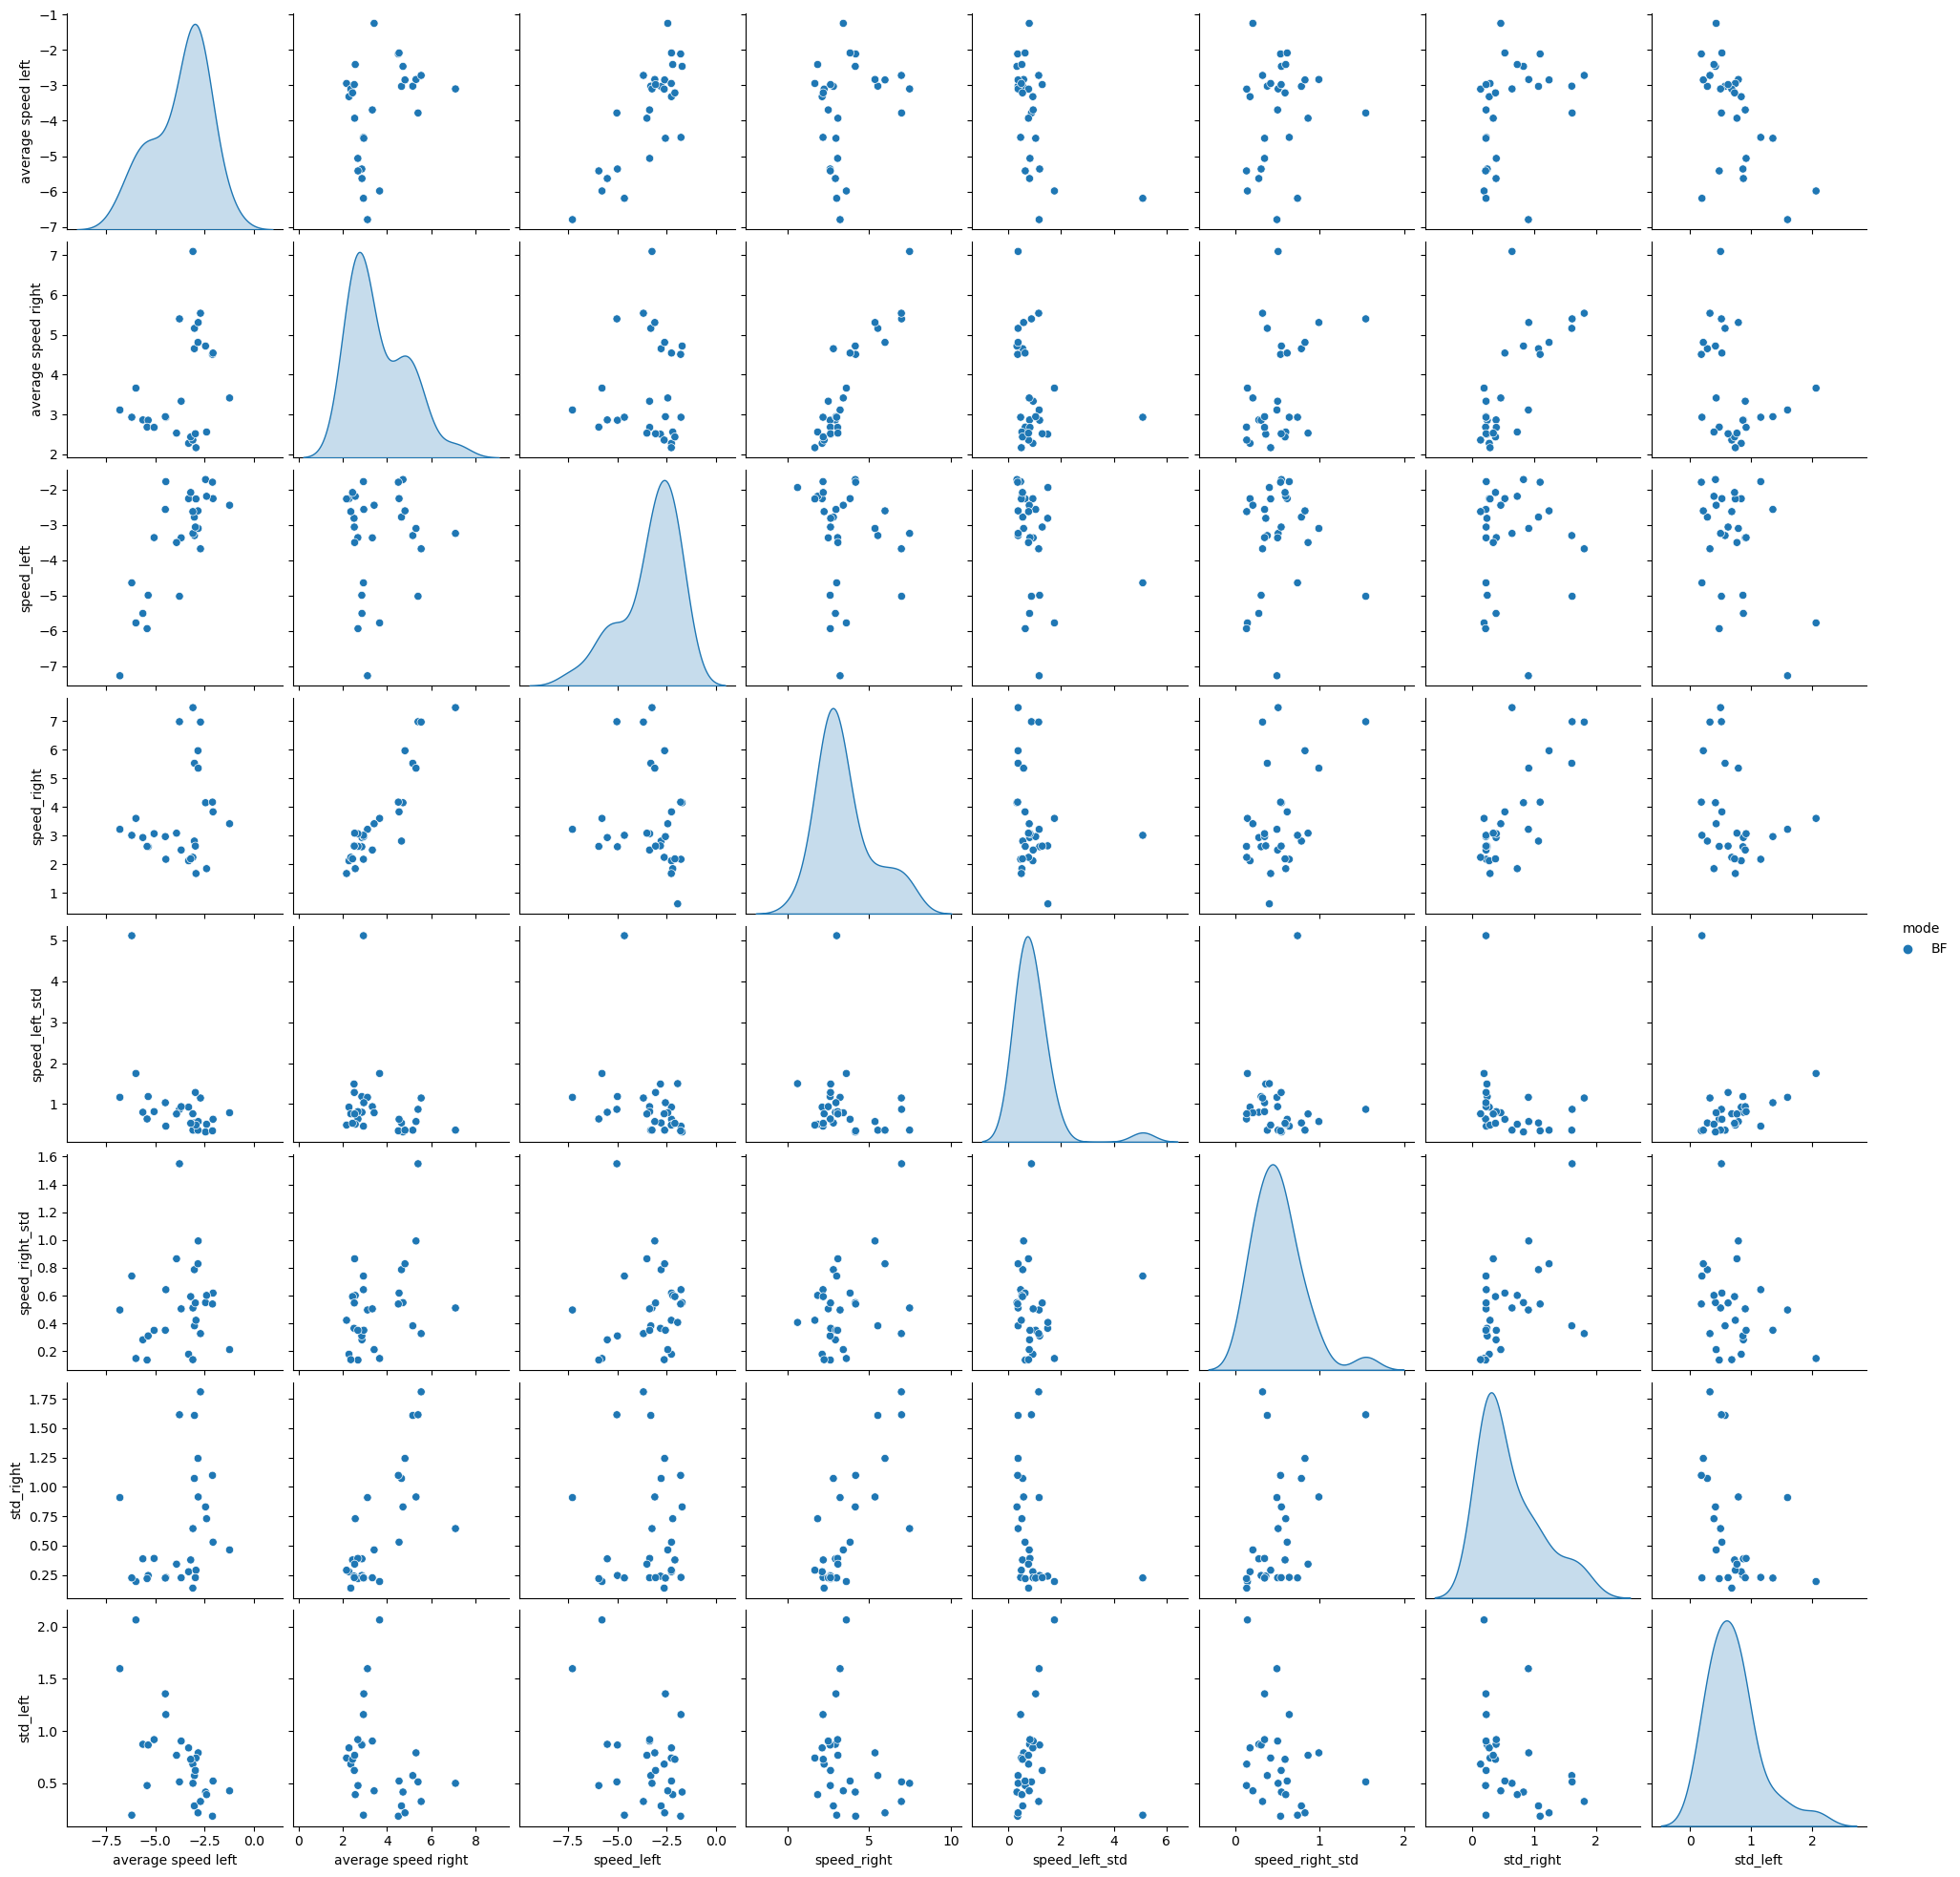

In [84]:
sns.pairplot(BF_comb,
             # hue='mode',
             kind='scatter',
             # diag_kind='hist',
             vars=['average speed left','average speed right','speed_left','speed_right','speed_left_std','speed_right_std','std_right', 'std_left'],
             dropna=True,
             # plot_kws={'alpha': 0.01},
            )

C:\Users\daant\anaconda3\envs\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\daant\anaconda3\envs\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\daant\anaconda3\envs\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\daant\anaconda3\envs\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

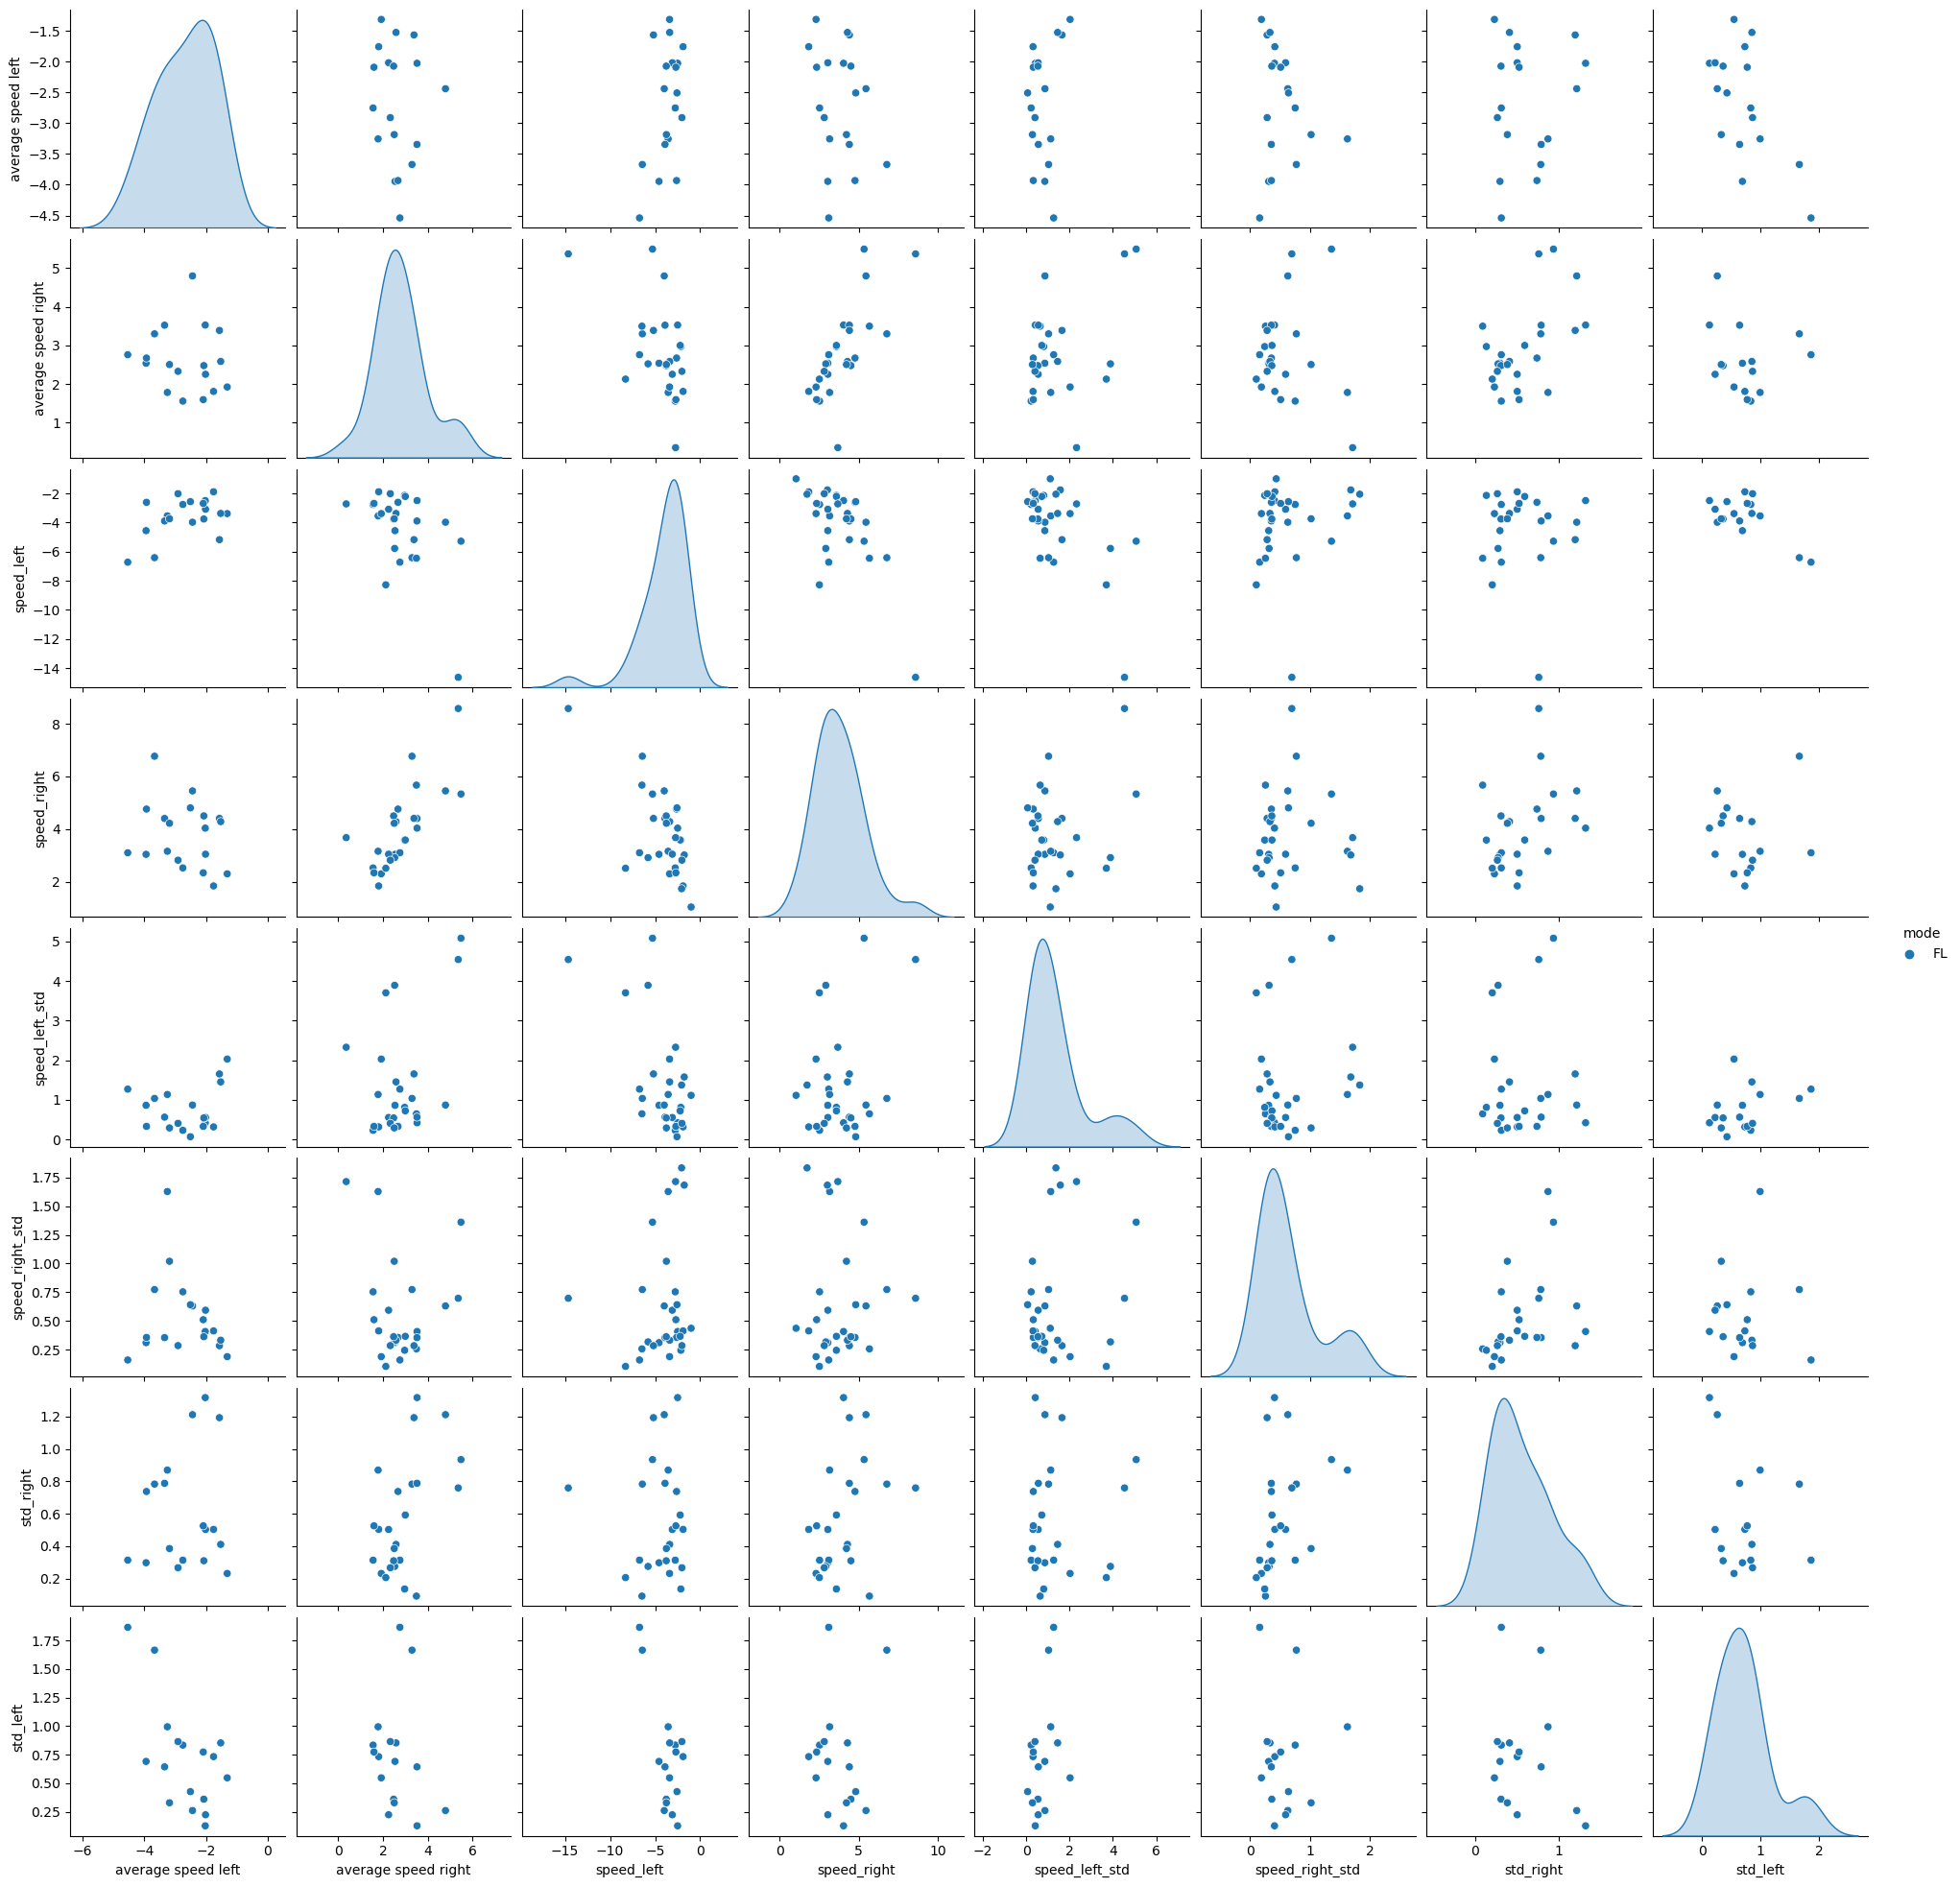

In [85]:
sns.pairplot(FL_comb,
             # hue='mode',
             kind='scatter',
             # diag_kind='hist',
             vars=['average speed left','average speed right','speed_left','speed_right','speed_left_std','speed_right_std','std_right', 'std_left'],
             dropna=True,
             # plot_kws={'alpha': 0.01},
            )